In [82]:
#Import all needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [159]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hackathon_dec_2024/train.csv')

df_1= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hackathon_dec_2024/test.csv')

submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hackathon_dec_2024/sample_submission.csv')

In [84]:
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [85]:
# Response is Target Column , whihc is 0 or 1

In [86]:
# Length of the Dataset - finding
df.shape

(381109, 12)

In [87]:
# columns of the dataset
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [89]:
# Missing or Duplicate Values

df.isnull().sum()

,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


In [90]:
#show the few rows

df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [91]:
# show the unique count of the values in each row

df.nunique()

,0
id,381109
Gender,2
Age,66
Driving_License,2
Region_Code,53
Previously_Insured,2
Vehicle_Age,3
Vehicle_Damage,2
Annual_Premium,48838
Policy_Sales_Channel,155


In [92]:
# Observation from the Dataset:

# 1. Train data set is not having any null or duplicates
# 2. Our dependent feature : Response is categorical column
# 3. There are several numneric and catagerocical column in dataset

In [93]:
# identifying ignore columns,target column
ign_col = ['id']
tgt_col = ['Response']


In [94]:
df.select_dtypes(include='object').columns

Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')

In [95]:
df.select_dtypes(exclude='object').drop(columns=ign_col+tgt_col)

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
0,44,1,28.0,0,40454.0,26.0,217
1,76,1,3.0,0,33536.0,26.0,183
2,47,1,28.0,0,38294.0,26.0,27
3,21,1,11.0,1,28619.0,152.0,203
4,29,1,41.0,1,27496.0,152.0,39
...,...,...,...,...,...,...,...
381104,74,1,26.0,1,30170.0,26.0,88
381105,30,1,37.0,1,40016.0,152.0,131
381106,21,1,30.0,1,35118.0,160.0,161
381107,68,1,14.0,0,44617.0,124.0,74


In [96]:
# identifying  category cols and numerical cols

# category cols
cat_cols = df.select_dtypes(include='object').columns

cat_cols

Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')

In [97]:
# numeric cols
num_cols = df.select_dtypes(exclude='object').drop(columns=ign_col+tgt_col).columns
num_cols

Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object')

In [98]:
feature_cols = list(cat_cols)+list(num_cols)

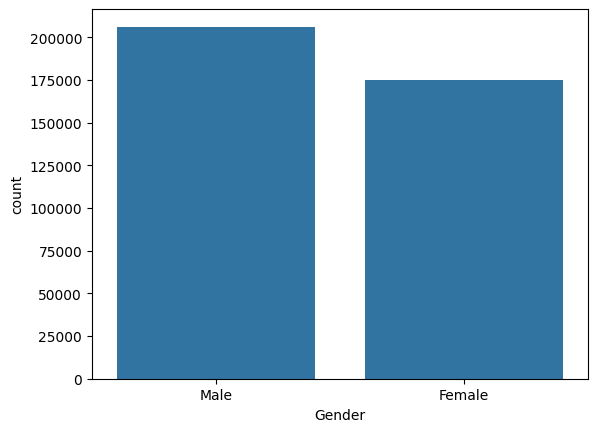

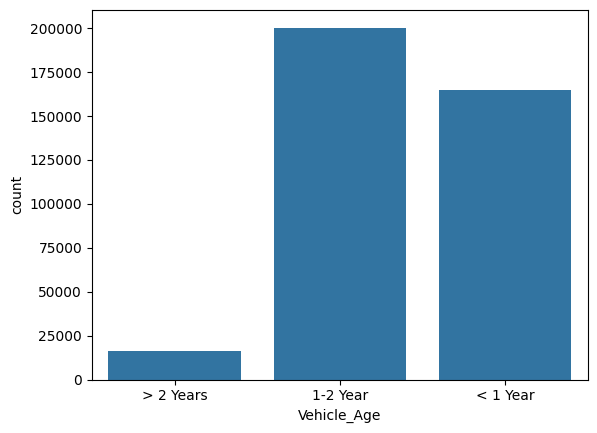

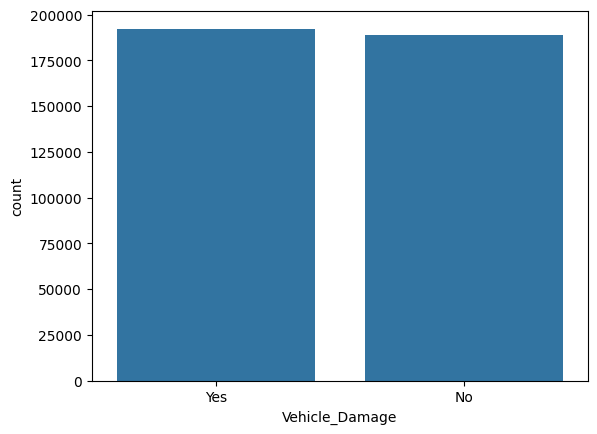

In [99]:
for col in df.select_dtypes(include=['object']).columns:
    sns.countplot(x=col, data=df)
    plt.show()

<Axes: xlabel='Response', ylabel='count'>

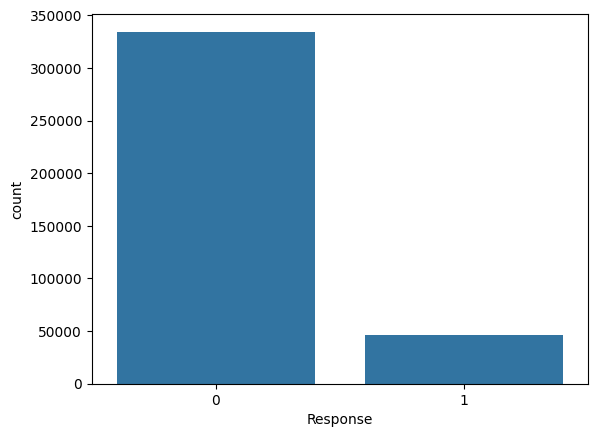

In [100]:
# count plot of response:

sns.countplot(x='Response', data=df)

# looks , it is highly imbalanced

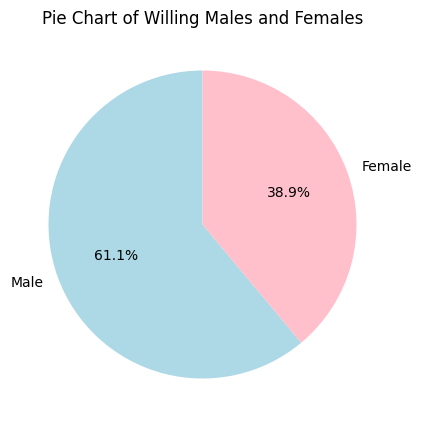

In [101]:
#  plot of willing males and females:

# Filter willing customers(Response = 1)
willing_cutomer = df[df['Response'] == 1]

# count of willing males and females
gender_counts = willing_cutomer['Gender'].value_counts()

#  plot of willing males and females:

# Filter willing customers(Response = 1)
willing_cutomer = df[df['Response'] == 1]

# count of willing males and females
gender_counts = willing_cutomer['Gender'].value_counts()

# Pie Chart
plt.figure(figsize=(5,5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'pink'])
plt.title('Pie Chart of Willing Males and Females')
plt.show()


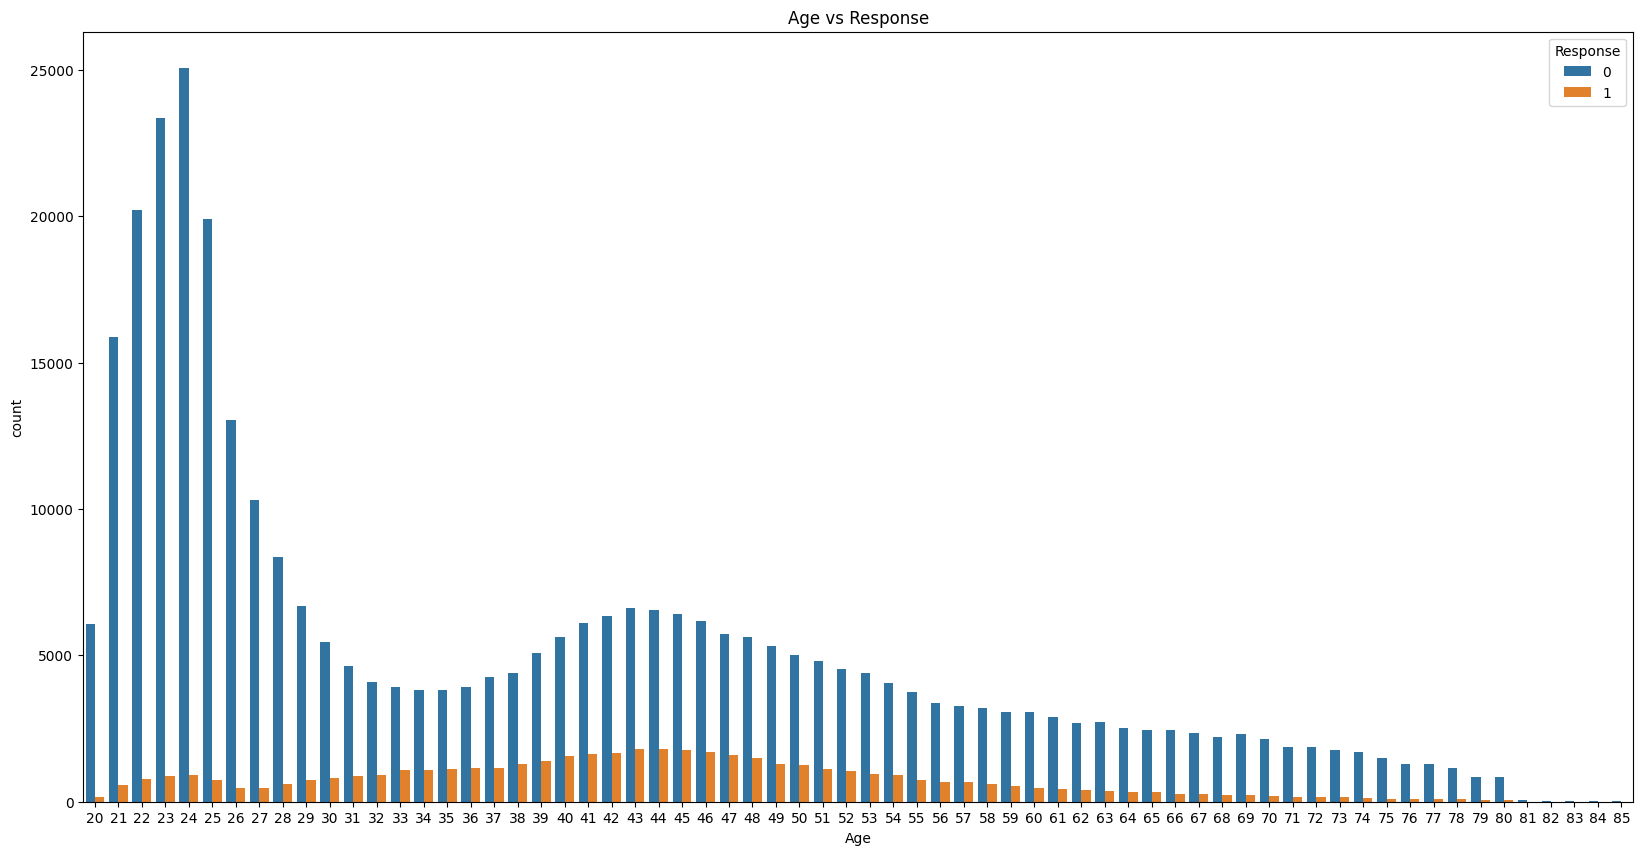

In [102]:
# Plot of age vs response

plt.figure(figsize = (20,10))
sns.countplot(x='Age', hue ='Response', data=df)
plt.title('Age vs Response')
plt.show()

In [103]:
#  The above plot shows that positive and negative response of different age groups
# People above the age of 30 and below the age of 60 - more keen to take insurance

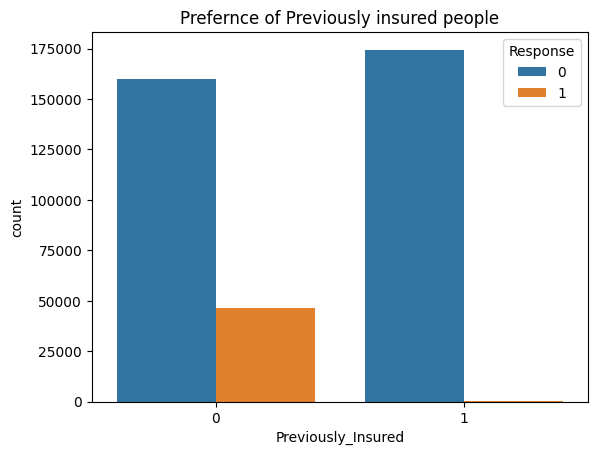

In [104]:
#  Prefernce of previously insured people

sns.countplot(x=df["Previously_Insured"], hue = df['Response'])
plt.title("Prefernce of Previously insured people")
plt.show()

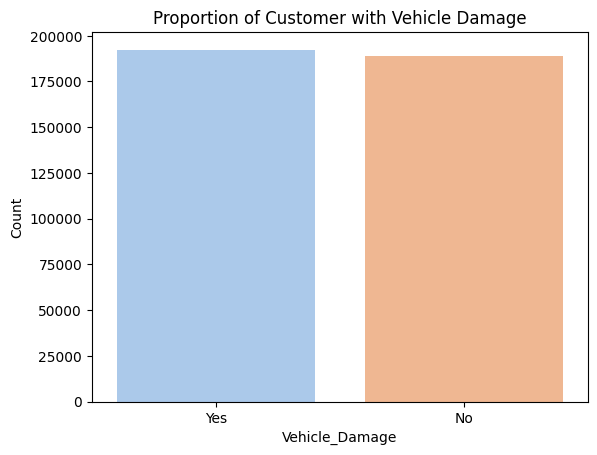

In [105]:
# Proportion of customer with vehicle damage

sns.countplot(x='Vehicle_Damage', data=df, palette='pastel')
plt.title('Proportion of Customer with Vehicle Damage')
plt.xlabel('Vehicle_Damage')
plt.ylabel('Count')
plt.show()

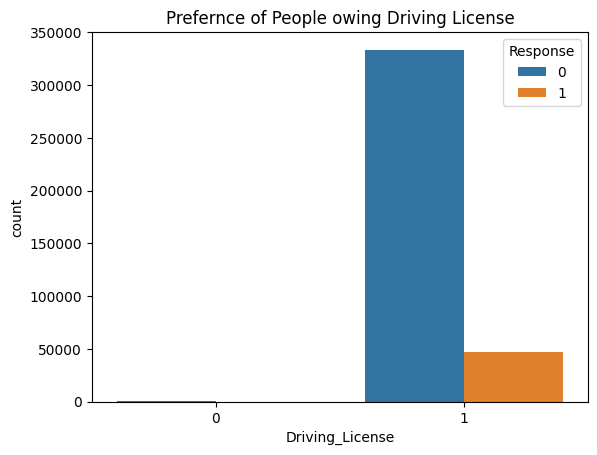

In [106]:
# Prefernce of people owing driving license

sns.countplot(x=df['Driving_License'], hue = df['Response'])
plt.title('Prefernce of People owing Driving License')
plt.show()

In [107]:
# Customers who are interested are likely to have driving license

Text(0.5, 0, 'Vehicle_Age')

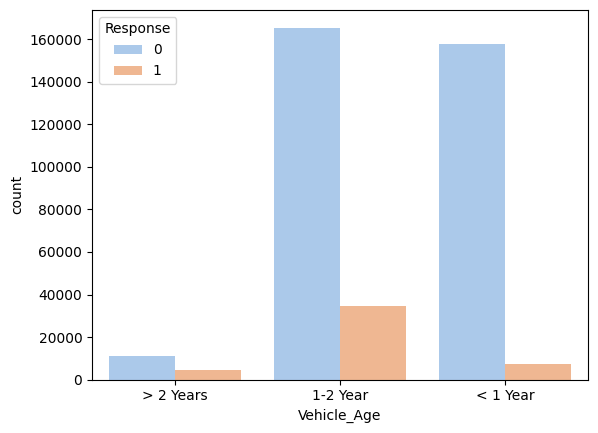

In [108]:
#  Response of the owners based on their life of their cars

sns.countplot(x='Vehicle_Age', data=df, palette ='pastel', hue ='Response')
plt.xlabel('Vehicle_Age')

In [109]:
# customers with vehicle age 1-2 are more likley to take the insurance when compared to others

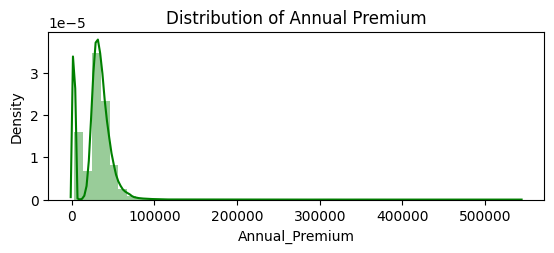

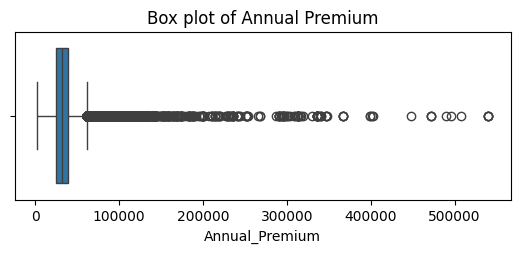

In [110]:
#  Distribution of Annual premium :

plt.subplot(2,1,1)
sns.distplot(df['Annual_Premium'], color='green')
plt.title('Distribution of Annual Premium')
plt.xlabel('Annual_Premium')
plt.ylabel('Density')
plt.show()

plt.subplot(2,1,2)
sns.boxplot(x= df['Annual_Premium'])
plt.title('Box plot of Annual Premium')
plt.xlabel('Annual_Premium')
plt.show()

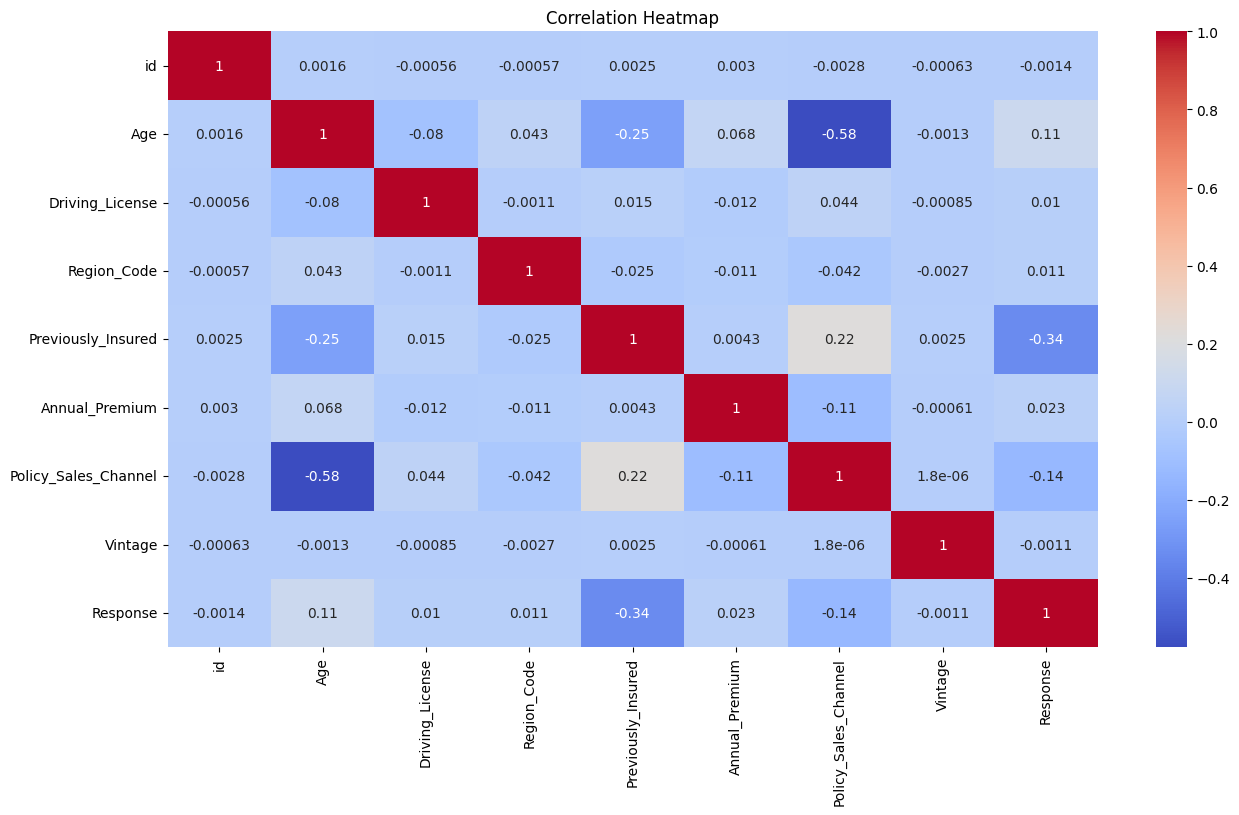

In [111]:
# Correlation Heatmap
# Select only numeric features for correlation calculation
numeric_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(15,8))

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm') # Fix: Changed 'cmaps' to 'cmap'
plt.title('Correlation Heatmap')
plt.show()

In [112]:
### Fields which have high correlation with Target(Response)
#### Previously_Insured,Policy_Sales_Channel,Age

In [113]:
# Converting all the fields(input columns) to numerical cols to understand correlation b/w input features and target
gender = {'Male':0,'Female':1}
v_age = {'< 1 Year':1,'1-2 Year':2,'> 2 Years':3}
v_damage = {'No':0,'Yes':1}



In [114]:
New_X=df.drop(columns='id')



In [115]:
New_X['Gender']=New_X['Gender'].map(gender)
New_X['Vehicle_Age']=New_X['Vehicle_Age'].map(v_age)
New_X['Vehicle_Damage']=New_X['Vehicle_Damage'].map(v_damage)



In [116]:
# New_X['Response']=y

New_X.head(2)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,44,1,28.0,0,3,1,40454.0,26.0,217,1
1,0,76,1,3.0,0,2,0,33536.0,26.0,183,0


In [117]:
### Fields which have high correlation with Target(Response)
#### Vehicle_Damage,Previously_Insured,Vehicle_Age,Policy_Sales_Channel,Age

In [118]:
sns.pairplot(df)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [119]:
New_X.corr()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
Gender,1.000000,-0.145545,0.018374,-0.000604,0.081932,-0.160427,-0.091606,-0.003673,0.111159,0.002517,-0.052440
Age,-0.145545,1.000000,-0.079782,0.042574,-0.254682,0.765790,0.267534,0.067507,-0.577826,-0.001264,0.111147
Driving_License,0.018374,-0.079782,1.000000,-0.001081,0.014969,-0.037306,-0.016622,-0.011906,0.043731,-0.000848,0.010155
Region_Code,-0.000604,0.042574,-0.001081,1.000000,-0.024659,0.043778,0.028235,-0.010588,-0.042420,-0.002750,0.010570
Previously_Insured,0.081932,-0.254682,0.014969,-0.024659,1.000000,-0.380873,-0.824143,0.004269,0.219381,0.002537,-0.341170
Vehicle_Age,-0.160427,0.765790,-0.037306,0.043778,-0.380873,1.000000,0.396873,0.041580,-0.550663,-0.001892,0.221874
Vehicle_Damage,-0.091606,0.267534,-0.016622,0.028235,-0.824143,0.396873,1.000000,0.009349,-0.224377,-0.002064,0.354400
Annual_Premium,-0.003673,0.067507,-0.011906,-0.010588,0.004269,0.041580,0.009349,1.000000,-0.113247,-0.000608,0.022575
Policy_Sales_Channel,0.111159,-0.577826,0.043731,-0.042420,0.219381,-0.550663,-0.224377,-0.113247,1.000000,0.000002,-0.139042
Vintage,0.002517,-0.001264,-0.000848,-0.002750,0.002537,-0.001892,-0.002064,-0.000608,0.000002,1.000000,-0.001050


<Axes: >

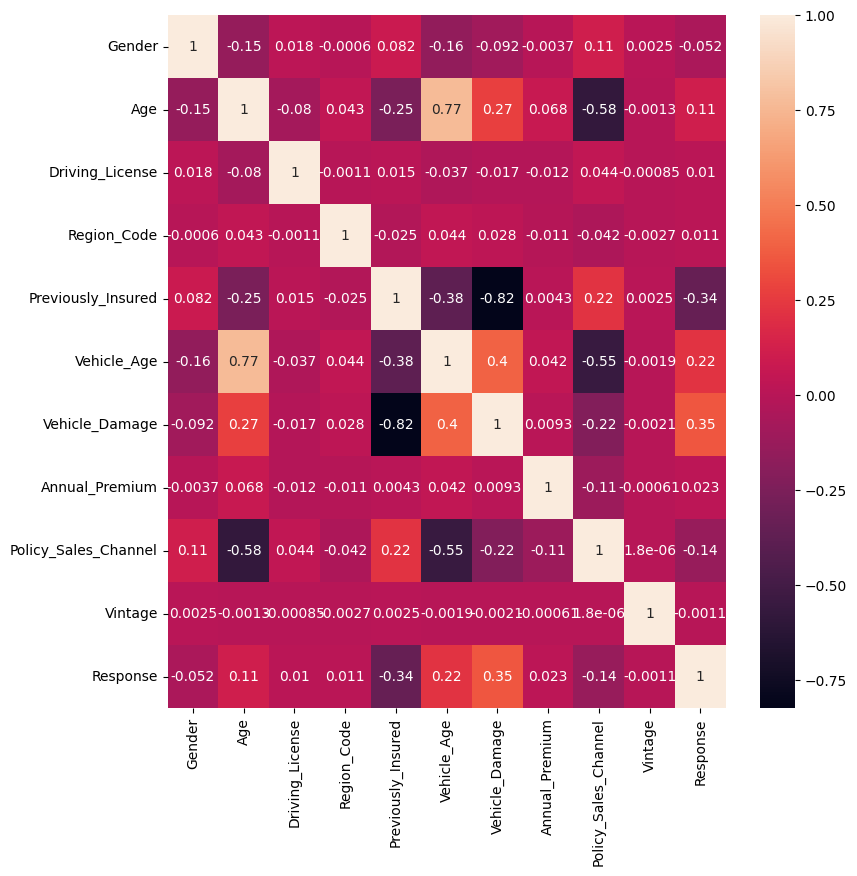

In [120]:
plt.figure(figsize=(9,9))
sns.heatmap(New_X.corr(),annot=True)

In [121]:
### Fields which have high correlation with Target(Response)
#### Vehicle_Damage,Previously_Insured,Vehicle_Age,Policy_Sales_Channel,Age

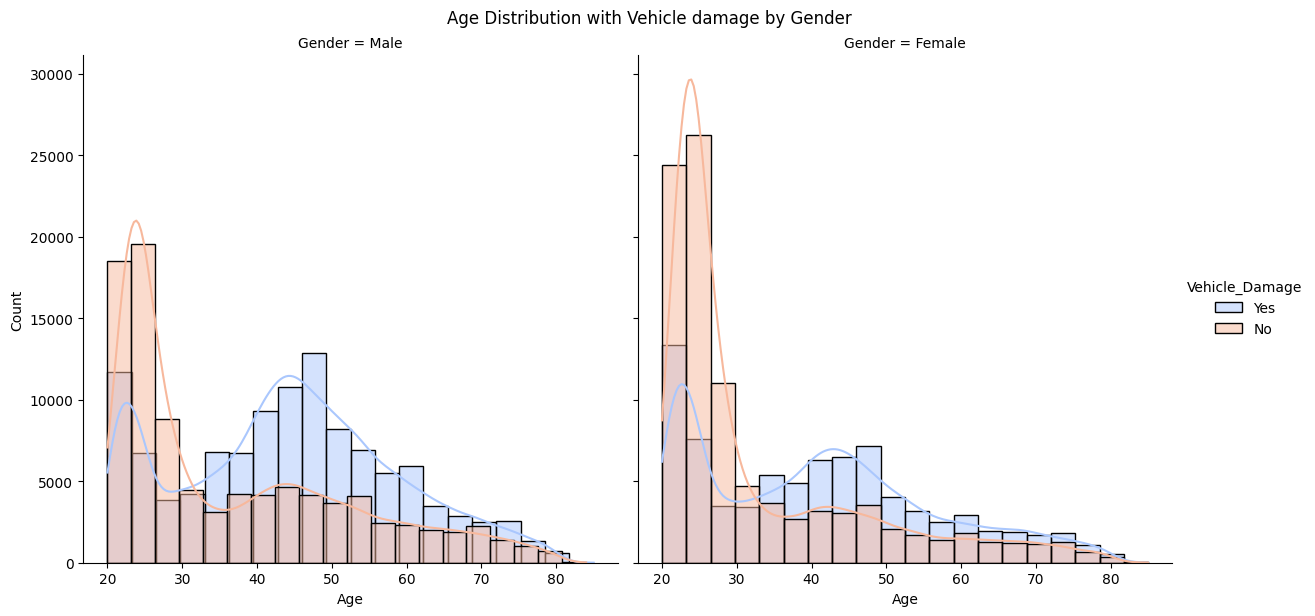

In [127]:
# Vehicle damage across  gender

g = sns.FacetGrid(df, col="Gender", hue='Vehicle_Damage', height=6, palette ='coolwarm', aspect=1)
g.map(sns.histplot, 'Age', kde=True, bins=20).add_legend()
g.fig.suptitle('Age Distribution with Vehicle damage by Gender', y=1.02)
plt.show()

In [128]:
#  Damage beteween 30 - 80 Male and female

In [129]:
# Data Pre Processing:
# 1. Handling Missing Values - No values missing in the dataset

# Handling Outliers

def detect_outliers_iqr(df,column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1-1.5*IQR
  upper_bound = Q3+1.5*IQR
  outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
  return outliers

outliers = detect_outliers_iqr(df, 'Annual_Premium')
print(f"Outliers in Annual Premium: \n{outliers}")

Outliers in Annual Premium: 
            id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
25          26  Female   21                1         28.0                   1   
37          38  Female   25                1         28.0                   1   
67          68    Male   60                1         28.0                   0   
139        140    Male   21                1         29.0                   1   
149        150  Female   22                1         11.0                   1   
...        ...     ...  ...              ...          ...                 ...   
380959  380960    Male   25                1          8.0                   1   
380998  380999  Female   33                1          8.0                   0   
381035  381036  Female   22                1         11.0                   1   
381047  381048  Female   52                1          8.0                   1   
381079  381080    Male   33                1         28.0                   0   

In [130]:
# Function to detect Outliers in all numeric columns using IQR

def detect_outliers_in_columns(df,columns):
  outliers_dict = {}
  for column in columns:
      Q1 = df[column].quantile(0.25)
      Q3 = df[column].quantile(0.75)
      IQR = Q3 - Q1
      lower_bound = Q1-1.5*IQR
      upper_bound = Q3+1.5*IQR
      outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
      if not outliers.empty:
        outliers_dict[column] = len(outliers)
  return outliers_dict

# Select Numeric columns
numeric_columns = df.select_dtypes(include=['float64','int64']).columns

# Detect outliers in numeric columns
# Fixed: Changed function call from 'detect_outilers_in_columns' to 'detect_outliers_in_columns'
outliers_summary = detect_outliers_in_columns(df, numeric_columns)

#  Print Summary of columns with outliers and their counts
print(f"Outliers detected in the following columns:\n{outliers_summary}")

Outliers detected in the following columns:
{'Driving_License': 812, 'Annual_Premium': 10320, 'Response': 46710}


## Preceeding with preprocessing,pipeline creation and Model building

In [122]:
# importing preprocessing,pipeline and ML libraires

from sklearn.preprocessing import OneHotEncoder,StandardScaler

from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,auc,classification_report,f1_score,accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier,StackingClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

In [132]:

#Categorical pipeline:

cat_pipe_encode = Pipeline(steps=[
    ('ohe',OneHotEncoder(handle_unknown='ignore')) # Applying OneHot Encoding
])

#Numerical pipeline:
num_pipe_encode = Pipeline(steps=[
    ('scale',StandardScaler())# Applying Standard Scaling
])

In [133]:
# identifying ignore columns,target column
ign_col = ['id']
tgt_col = ['Response']

In [134]:
df.select_dtypes(include='object').columns

Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')

In [135]:
# Create pipeline b/w pipeline & columns

preprocess = ColumnTransformer(transformers=[
    ('cat_encode',cat_pipe_encode,cat_cols), # Categorical col mapping with cat_pipe_encode pipeline
    ('num_encode',num_pipe_encode,num_cols) # numerical col mapping with num_pipe_encode pipeline
])

In [136]:
# Assigning ML - Algorithm to a variable
mymodel = LogisticRegression()

In [137]:
# Incorporating Preprocessing and ML-Modeling into a one-single pipeline.
model_pipeline = Pipeline(steps=[
    ('preprocess',preprocess), # preprocessing
    ('mlmodel',mymodel) #ML-Modeling - the will be taken from the variable mymodel
])

In [142]:
train = df
test = df_1

In [143]:
model_pipeline


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')),
                                                 ('num_encode',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object'))])),
                ('mlmodel', LogisticRegression())])

In [144]:
# Segreating X & y cols
X = train.drop(columns=ign_col+tgt_col)
X.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39


In [145]:
y=train['Response']

In [146]:
train_X,val_X,train_y,val_y = train_test_split(X,y,test_size=0.2,random_state=42)

In [147]:
train_X.shape,val_X.shape,train_y.shape,val_y.shape

((304887, 10), (76222, 10), (304887,), (76222,))

In [148]:
# fitting model
model_pipeline.fit(train_X,train_y)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')),
                                                 ('num_encode',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object'))])),
                ('mlmodel', LogisticRegression())])

In [149]:
# Getting cloumn names post preprocessing
model_pipeline.named_steps['preprocess'].named_transformers_['cat_encode'].get_feature_names_out(input_features=cat_cols)

array(['Gender_Female', 'Gender_Male', 'Vehicle_Age_1-2 Year',
       'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years',
       'Vehicle_Damage_No', 'Vehicle_Damage_Yes'], dtype=object)

In [150]:
# Prediction using the ML-model - Sample prediction
pred_train=model_pipeline.predict(train_X)
pred_test=model_pipeline.predict(val_X)

In [151]:
print(classification_report(train_y,pred_train))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94    267700
           1       0.46      0.00      0.00     37187

    accuracy                           0.88    304887
   macro avg       0.67      0.50      0.47    304887
weighted avg       0.83      0.88      0.82    304887



In [152]:
print ('Train f1 score:',f1_score(train_y,pred_train))
print ('Test  f1 score:',f1_score(val_y,pred_test))


Train f1 score: 0.0003225806451612903
Test  f1 score: 0.0


In [160]:
submission.columns

Index(['id', 'Response'], dtype='object')

In [161]:
submission['Response']=model_pipeline.predict(test)

In [162]:
submission.head(3)

,id,Response
0,381110,0
1,381111,0
2,381112,0


In [163]:
# Creating submission.csv file from simple Logistic model
submission.to_csv('/content/drive/MyDrive/Colab Notebooks/Hackathon_dec_2024/Logistic_reg_submission.csv',index=False)

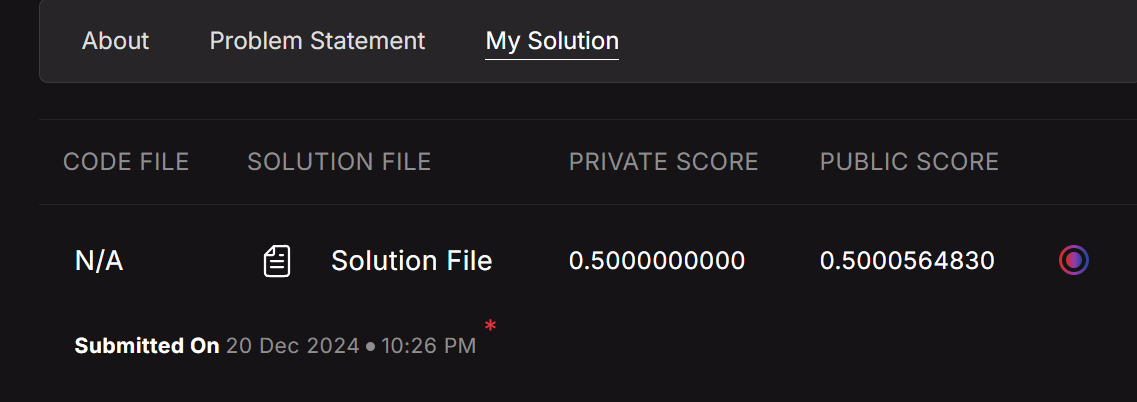